# MADS03  An example of Univariate Exploratory Data Analysis

## Introduction

Notebook MADS03 zooms in on Exploratory Data Analysis (EDA) of the individual features of a dataset (<i>univariate</i> analyis). Other preparatory notebooks introduce the topics of bivariate and multivariate EDA in weeks to follow. 

As you probably already know, EDA is not a specific methodology but more a state of mind: you should put yourself in a mode of wanting to empirically detect phenomena in available data (hence <i>exploration</i>) driven by informative questions like for instance "is there a relationship between the edibility of a mushroom and its cap-color?" (see description of the dataset we'll be exploring in this notebook)"?     

Tools of the "trade" of EDA are descriptive and inferential statistics, vizualisation techniques and modeling techniques (like linear regression or kNN, data clustering techniques or principal component analysis). In terms of the CRISP-DM model, EDA is part of the Data Understanding and Data Preparation phases of CRISP-DM (the Cross Industry Proces Model for Data Mining). The goal of EDA is to get to know the data guided by the aforementioned informative questions and determine if the data suffers from any quality problems.

Univariate exploratory data analysis is the most basic step in EDA as it takes indivual features as analysis objects. The kind  of informative questions mentioned above will therefore necessarily be rather basic of nature in the beginning as it doesn't address relationships between independent features and between independent and dependent features yet.    


## The Mushroom Dataset

The dataset used in this notebook is <i>inspired</i> by a very well known dataset about mushrooms and their edibility first published in the UCI Machine Learning repository in 1987 [donated by Jeff Schlimmer](https://archive.ics.uci.edu/ml/datasets/mushroom). The 1987 dataset describes some 8000 North American mushrooms of 23 different species of 2 mushroom families (353 entries per species).

The dataset we are going to use is a <i>simulated</i> dataset consisting mainly of European mushrooms. The data is extracted using text mining from the mushroom identification book with title "Mushrooms and Toadstools" (Harding, P., Outen, A. "Mushrooms", ISBN 9780007183074, (Collins, 2013)). It consists of of more than 60069 imaginary (but sensibly generated) mushroom "observations", again 253 mushrooms per species, but this time far more species are involved (173 in total). 

<font color="black">
    </br>
    
1. Title: Secondary mushroom data
    </br>
    
2. Sources:
	(a) Mushroom species drawn from source book:
		Patrick Hardin.Mushrooms & Toadstools.
	    Zondervan, 1999
	(b) Inspired by this mushroom data:
		Jeff Schlimmer. Mushroom Data Set. Apr. 1987.
	(c) Author: Dennis Wagner
	(d) Date: 05 September 2020
    </br>
3. Relevant information:
	This dataset includes 61069 hypothetical mushrooms with caps based on 173 species (353 mushrooms per species). Each mushroom is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended (the latter class was combined with the poisonous class). Of the 20 variables, 17 are nominal and 3 are metrical.
    </br>
4. Data simulation:
	The related Python project (Sources (c)) contains a Python module secondary_data_generation.py used to generate this data based on primary_data_edited.csv also found in the repository. Both nominal and metrical variables are a result of randomization. The simulated and ordered by species version is found in secondary_data_generated.csv. The randomly shuffled version is found in secondary_data_shuffled.csv.
    </br>
5. Class information:
	1. class poisonous=p, edibile=e (binary)
    </br>
   Variable Information:
   (n: nominal, m: metrical; nominal values as sets of values)
   1. cap-diameter (m):			float number in cm
   2. cap-shape (n):            bell=b, conical=c, convex=x, flat=f,
                                sunken=s, spherical=p, others=o
   3. cap-surface (n):          fibrous=i, grooves=g, scaly=y, smooth=s,
								shiny=h, leathery=l, silky=k, sticky=t,
								wrinkled=w, fleshy=e
   4. cap-color (n):            brown=n, buff=b, gray=g, green=r, pink=p,
								purple=u, red=e, white=w, yellow=y, blue=l, 
								orange=o,  black=k
   5. does-bruise-bleed (n):	bruises-or-bleeding=t,no=f
   6. gill-attachment (n):      adnate=a, adnexed=x, decurrent=d, free=e, 
								sinuate=s, pores=p, none=f, unknown=?
   7. gill-spacing (n):         close=c, distant=d, none=f
   8. gill-color (n):           see cap-color + none=f
   9. stem-height (m):			float number in cm
   10. stem-width (m):			float number in mm   
   11. stem-root (n):           bulbous=b, swollen=s, club=c, cup=u, equal=e,
                                rhizomorphs=z, rooted=r
   12. stem-surface (n): 		see cap-surface + none=f
   13. stem-color (n):			see cap-color + none=f
   14. veil-type (n):           partial=p, universal=u
   15. veil-color (n):          see cap-color + none=f
   16. has-ring (n):            ring=t, none=f
   17. ring-type (n):           cobwebby=c, evanescent=e, flaring=r, grooved=g, 
							    large=l, pendant=p, sheathing=s, zone=z, scaly=y, movable=m, none=f, unknown=?
   18. spore-print-color (n):   see cap color
   19. habitat (n):             grasses=g, leaves=l, meadows=m, paths=p, heaths=h,
                                urban=u, waste=w, woods=d
   20. season (n):				spring=s, summer=u, autumn=a, winter=w
   </font>
   </br>
   We start by instructing iPython to interactively plot graphics directly in
   the notebook. Furthermore libraries we expect to need in our EDA session
   are loaded into memory.

In [1]:
# First setting is a so called magic command specifying that figures
# produced by matplotlib, should be printed inline in the notebook cell
%matplotlib inline

In [2]:
# Import packages needed in this notebook
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import scipy.stats as ss 
#from ss import mannwhitneyu

## Importing the data
 
The first thing to do if you want to explore your data is to import the data into the analysis  environment. It's stored in a semicolon separated file format in a text file. Python's Pandas library offers a host of functions allowing you to import data of/in various formats. Real life use cases  usually require quite a bit of work. A lot of time is spent identifying, obtaining, importing, integrating and molding datasets into analyzable structures.

During the course you'll be confronted with far more messy data requiring "sanitizing" than the mushroom dataset we'll start with today. 

In [3]:
# Read the mushroom data which is stored in a comma separated value (actually semicolon 
# separated) value file into a variable, in this case variable df_mr. The Pandas function 
# returns a dataframe, one of the most common data structures used in data analytics. 
df_mr = pd.read_csv('../data/secondary_data.csv', sep = ';')

## Where to start?

Though there's no <i>formal</i> structured EDA method to cling on to, it's common practice to start the EDA process analyzing the individual features (<i>Univariate</i> EDA). We are lucky enough to have a rough cut description of the dataset presented to us on a silver platter specifying the features present in the dataset and some characterization of their type (1 - nominal = semantically unordered categorical data, 2 - metrical = numeric data of the ratio type). 

In [4]:
# Check the datatypes of the features in just imported.
df_mr.dtypes

class                    object
cap-diameter            float64
cap-shape                object
cap-surface              object
cap-color                object
does-bruise-or-bleed     object
gill-attachment          object
gill-spacing             object
gill-color               object
stem-height             float64
stem-width              float64
stem-root                object
stem-surface             object
stem-color               object
veil-type                object
veil-color               object
has-ring                 object
ring-type                object
spore-print-color        object
habitat                  object
season                   object
dtype: object

In [5]:
# Some context creating questions: 
# how many mushroom entries does the set actually contain?

print(len(df_mr.index))

# and how many features are included
print(len(df_mr.columns))

61069
21


In [6]:
# What kind of data is actually recorded per mushroom?
df_mr.head(5)

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [7]:
# Check for duplicate rows in imported data set
df_mr.duplicated().sum()

146

## Interpretation

Some duplicate rows are included in the data set. It wouldn't hurt much if we removed the duplicates keeping the first version of a set of duplicates in.

Looking at the data we see data of the categorical (fi p/x/f/g, etc) and numeric (fi 15.26, 16.95, etc) types: cap diameter and feature stem height look like numeric floating point data. Gill spacing is obviously missing entries (NaN stands for Not a Number, one of Pandas' ways to express missingness of data). 

Question popping up: maybe all gill spacing data is missing. A short tour on the internet pointed out that not all mushrooms have gills ("any fungus of the basidiomycetous family Agaricaceae, in which the spores are produced on gills underneath a cap", source https://www.collinsdictionary.com/dictionary/english/gill-fungus). 

The non-numeric features and their values are all one letter acronyms. For instance feature class value 'p' stands for poisonous (not editable). The values have all been documented in a code book accompanying this generated extended mushroom dataset.

In [9]:
# Code dropping the duplicate rows/observations
df_mr = df_mr.drop_duplicates(keep='first')
len(df_mr.index)

60923

In [10]:
# Are all of gill spacing entries missing? Let's calculate the percentage of 
# missingness.
(np.sum(df_mr['gill-spacing'].isnull())/len(df_mr.index)) * 100
# Forty one percent of the gill spacing data is missing.  

41.137173152996404

In [11]:
# Checking the last 5 rows also proofs that gill spacing is not missing in all 
# rows (value f). 
df_mr.tail(5)

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
61064,p,1.18,s,s,y,f,f,f,f,3.93,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61065,p,1.27,f,s,y,f,f,f,f,3.18,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61066,p,1.27,s,s,y,f,f,f,f,3.86,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61067,p,1.24,f,s,y,f,f,f,f,3.56,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61068,p,1.17,s,s,y,f,f,f,f,3.25,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u


In [12]:
# Let's check how many values are actually missing per feature (percentage).
df_mr.isnull().sum()/len(df_mr.index) * 100

class                    0.000000
cap-diameter             0.000000
cap-shape                0.000000
cap-surface             23.176797
cap-color                0.000000
does-bruise-or-bleed     0.000000
gill-attachment         16.176157
gill-spacing            41.137173
gill-color               0.000000
stem-height              0.000000
stem-width               0.000000
stem-root               84.592026
stem-surface            62.574069
stem-color               0.000000
veil-type               94.785221
veil-color              87.832182
has-ring                 0.000000
ring-type                4.055939
spore-print-color       89.616401
habitat                  0.000000
season                   0.000000
dtype: float64

## Interpretation

Quite a lot of features are missing data values. There may be numerous possible causes:

1) The study adopted the feature structure of the data set of the 1987 North American two family set. It may be the case that the families and species mentioned in the book of Harding and Outen which was used to mine mushroom data from, doesn't really have the kind of features the North American two family set lists. For instance a mushroom that doesn't have a stem (and those do exist, I have one in my garden at the moment of working on this notebook called a "boleet"!) seems to be recorded with a stem height of 0 centimers. If the stem is indeed non existant, its surface cannot be described either (perhaps that's recorded as a NaN). A logical question popping up: are all mushrooms with stem-length 0 mushrooms with stem-surface entries missing too (so the ones containing the NaNs)? 
2) More technical reasons may cause missingness of value too. Data mining looks for <i>recognizable</i> information in usually <i>unstructured</i> text fragments. If a description of stem length is not included in the mining dictionary the  algorithm cannot extract it. A more subtle reason might be that the key words/matching words used in mining do not contain other syntactically possible formulations of one and the same concept. Stem lenght, stalk length, stem height, stalk height, it all means the same!   

In [13]:
# Let's produce basic descriptive statistics in one go for all features in the 
# dataset. Pandas describe function when instructed to produce statistics for 
# all types of features spits out a mix of stats applying to categorical 
# features and numeric features.
df_mr.describe(include = 'all')

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
count,60923,60923.000000,60923,46803,60923,60923,51068,35861,60923,60923.000000,...,9387,22801,60923,3177,7413,60923,58452,6326,60923,60923
unique,2,NaN,7,11,12,2,7,3,12,NaN,...,5,8,13,1,6,2,8,7,8,4
top,p,NaN,x,t,n,f,a,c,w,NaN,...,s,s,w,u,w,f,f,k,d,a
freq,33742,NaN,26932,8184,24205,50333,12697,24682,18492,NaN,...,3177,6025,22926,3177,5474,45756,48215,2118,44063,30141
mean,NaN,6.741957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.597202,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,5.268435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.358757,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,0.380000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,3.490000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.650000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,5.880000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.960000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,8.550000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.750000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Interpretation

Notice that rows 2,3 and 4 contain information about categorical features. Unique reports the number of possible levels of the applicable categorical feature. For instance the class feature has a value set consisting of 2 unique values: 'p' for poisonous and 'e' for edible. Top indicates which categorical value is the mode of the categorical feature of interest. The freq(uency) row contains the number of mode values per categorical feature.

Categorical features obviously don't have numerical characteristics like max/min/mean/std. Therefore, if the rows 2/3 and 4 contain information, the rest of the rows contain nothing but NaN values vice versa.

Row 1 indicates the number of values present per feature.

The percentage rows 25/50/75 indicate a boundary value splitting the row set in 25/50/75 percent parts. In case of a symmetrical distribution of data values of a feature, the mean and the 50 percentile boundary value are the same. If this is not the case the distribution is "skewed" (so from a symmetrical point view distorted).

With cap-diameter as an example: "Is the cap diameter data distributed symmetrically over the overall range it spans?". This kind of information is very relevant because certain predictive algorithms we are going to apply in due time may operate better if the input data complies with the characteristics of the normal distribution (the "Gaussian" or "bell shaped" distribution) which is symmetrical.

The overall range of cap diameter data is max-min so 62.34 - 0.38 = 61.96 centimeters wide, the mean of the diameters = 6.73 centimers. If we rank all the diameter values from min to max and pick the one in the middle of the sequence (so about number 30534 in the sequence) thats is the 50% percentile value (also called the median, the one "in the middle"). In case of a perfectly symmetrical distributions the median and the mean should coincide. This is not the case.  

In [14]:
# The spread between numbers in a metrical dataset can be expressed in a summary 
# statistic called the variance. The variance is the mean of the sum of all 
# squared deviations of each of the metrical data points (like fi the mushroom's 
# stem height set of data points). 
# Deviation is the difference between a numeric value part of the dataset and 
# the mean of all the numeric values of that dataset. Squaring avoids cance-
# ling out of positive and negative deviations. 
var=df_mr["cap-diameter"].var()
var

27.75640922524749

In [15]:
# The square root of the variance is the standard deviation of the numeric 
# dataset also included in the overview statistics produced using the Pandas 
# dataframe's describe() function.
np.sqrt(var)

5.268435178043618

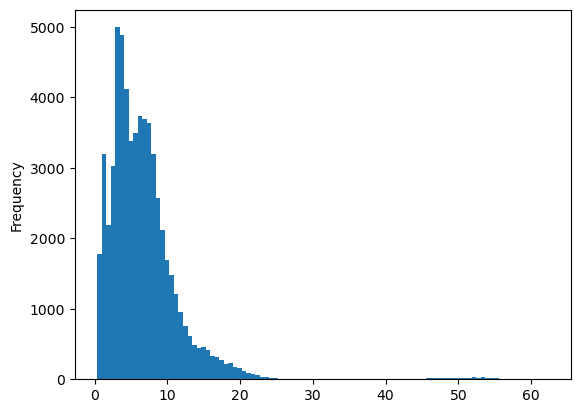

In [29]:
# Lets perform a quick visual check of the shape of the stem_height feature 
# distribution (is it symmetrically "bell" shaped?).
df_mr["cap-diameter"].plot.hist(bins= 100); 
# the semicolon surpresses some possibly confusing textual output, remove it to see that output

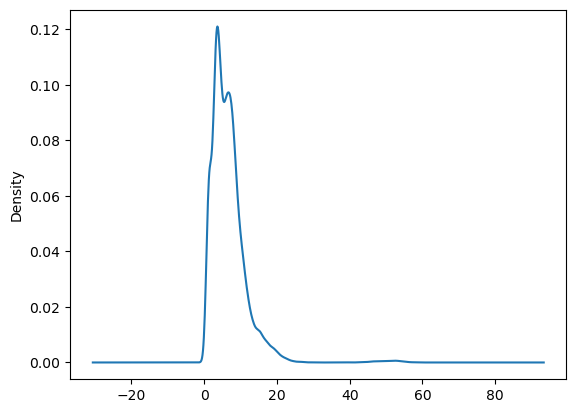

In [16]:
# Another way of representing the cap diameter data is by means of a density 
# plot. Density plots are a variation of histograms. It charts the values 
# from a selected column as equally binned distributions. It uses kernel 
# smoothing to smoothen out the noise. Thus, the plots are smooth across bins 
# and are not affected by the number of bins created, which helps create a 
# more defined distribution shape. The peaks of a density plot help display 
# where values are concentrated over the interval.
df_mr["cap-diameter"].plot.kde(bw_method=None, ind=None);

In [32]:
# Looking at the plot we conclude that the shape is not "bell" like so the 
# distribution is not a exemplary normal distribution. The distribution has 
# a long tail extending to the right.
# Another more formal way of saying this in statistical terms is "the distri-
# bution is right skewed". 

# Some of the caps are exceptionally wide! One hundred forty nine mushrooms have 
# caps over 50 cm wide! 

df_mr[df_mr['cap-diameter'] >= 50]['cap-diameter'].count()

195

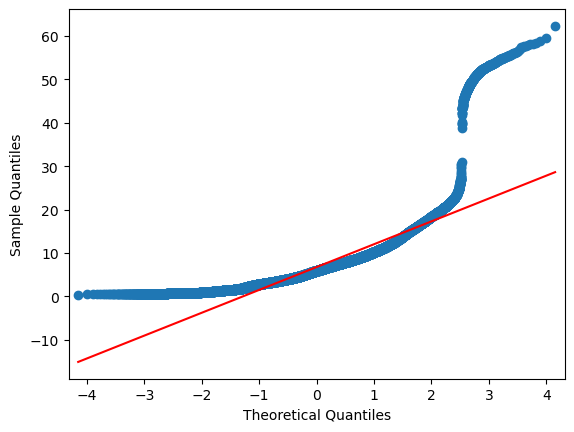

In [17]:
# A more formal way of testing (still graphically) if empirical data distributes 
# normally is by means of a qqplot. A qqplot compares the theoretical quantile
# values of a normal distribution with the empirical quantiles values.If the 
# blue and red line coincide, then the distribution is Gaussian. Clearly that's
# not the case.
fig = sm.qqplot(df_mr["cap-diameter"],line='s')
plt.show()

In [8]:
# If the blue line would coincide with the red line, the theoretical and 
# empirical quantiles match. This obviously is not the case! Note the gap
# in the curve!! More on this later.

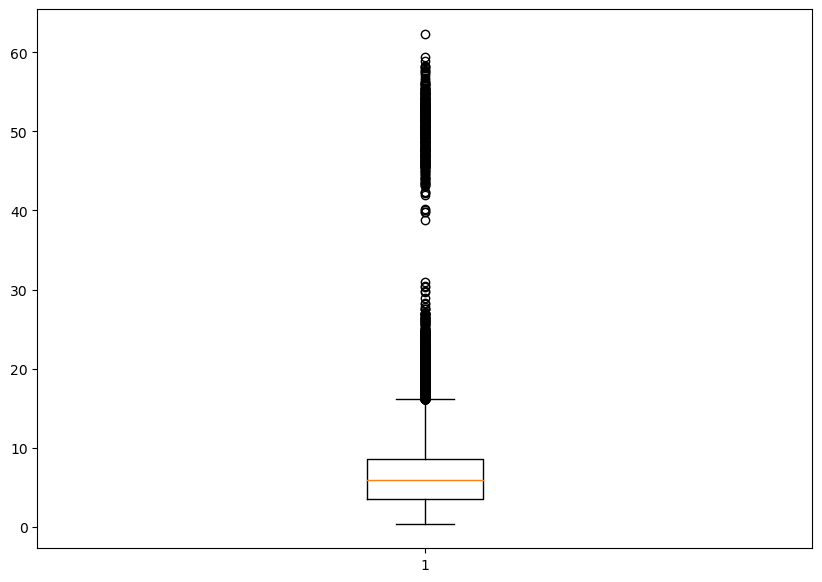

In [33]:
# We already found out that the cap diameter data distribution is not "bell" 
# shaped (so the data seems not to be normally distributed).
# We would also like to find out if there are observations of stem heights that 
# require further investigation because they are located at an abnormal 
# distance of other observations (so called outliers). 

# We will create a very basic plot of type boxplot, a plot that helps us 
# identify outliers.

plt.figure(figsize =(10, 7)) 
plt.boxplot(df_mr['cap-diameter'])
plt.show()

In [18]:
# So what does this crude boxplot tell us? The line in the box in the center of the 
# plot represents the median of the stem heights (5.86 centimeters).

# Code lines 2 and 3 determine the numerical values specifying the 25% and 75% 
# split values (in the ordered sequence of the numerical values). They make up 
# the lower and upper boundary values of the box in the boxplot.

# Code line 4 calculates the interquartile range, the difference between the 
# first and third quartile values. 

# Whiskers (aka fences) set the boundaries for outliers. They are calculated by 
# adding/subtracting 1.5 times the interquartile range from the first and 
# third quartile values. If there are no observations present outside the 
# range set by the whisker values, the whiskers extend till the maximum value 
# still within the calculated whisker range. 

# Observed values outside the calculated whisker ranges are commonly considered 
# to be outliers. 

print("cap-diameter")

# 1) 
median = np.quantile(df_mr['cap-diameter'].to_numpy(), q=0.5)  #calculates the median (split value at quartile two)
print(f"median: {median}") 

# 2) 
first=np.quantile(df_mr['cap-diameter'].to_numpy(), q=0.25) #calculates the value of the first quartile
print(f"quartile one: {first}")
# 3)
third=np.quantile(df_mr['cap-diameter'].to_numpy(), q=0.75) #calculates the split value of the third quartile
print(f"quartile three: {third}")
# 4) 
IQRange = third-first
print(f"interquartile range: {IQRange}")
# 5) 
TopWiskerCap = third + 1.5 * IQRange
print(f"upper limit for outliers: {TopWiskerCap}")
# 6) 
BottomWiskerCap = first - 1.5 * IQRange
print(f"lower limit for outliers: {BottomWiskerCap}")
# 7) 
Outliers = df_mr[df_mr['cap-diameter'] >= TopWiskerCap]['cap-diameter'].count() + df_mr[df_mr['cap-diameter'] <= BottomWiskerCap]['cap-diameter'].count() 

print(f"The total number of outliers is {Outliers}")

cap-diameter
median: 5.88
quartile one: 3.49
quartile three: 8.55
interquartile range: 5.0600000000000005
upper limit for outliers: 16.14
lower limit for outliers: -4.1000000000000005
The total number of outliers is 2396


## Investigation

Looking at the boxplot their seems to be an island of outliers well isolated of the other outliers. It may be the case that this group represents some cluster of highly similar mushrooms. A question comes up: "are these extreme outliers really equivalent perhaps even from the perspective of edibility?".

Let's investigate this.

In [25]:
# Put the big ones with the big caps in a separate dataframe.
df_big = df_mr[df_mr['cap-diameter'] > 35]
print(len(df_big))
# Select the poisonous ones from this df_big dataframe
print(len(df_big[df_big ['class']=='p']))
# If no rows concern poisoneus mushrooms, they must be all edible.

353
0


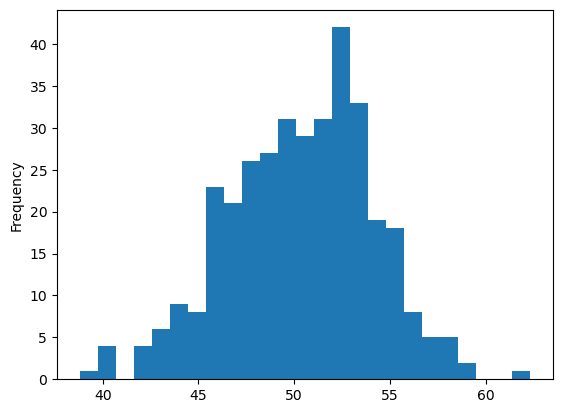

In [37]:
# Display the distribution of this subset of big capped mushrooms as a 
# histogram
df_big["cap-diameter"].plot.hist(bins= 25);

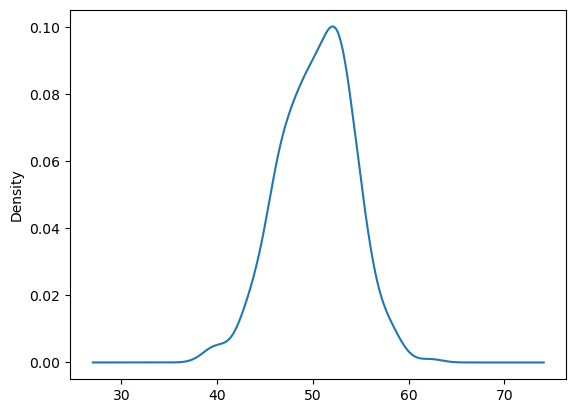

In [38]:
# Let's plot the density representation too
df_big["cap-diameter"].plot.kde(bw_method=None, ind=None)

continuous_vars = df_mr.dtypes[df_mr.dtypes == "float64"].index.values.tolist()


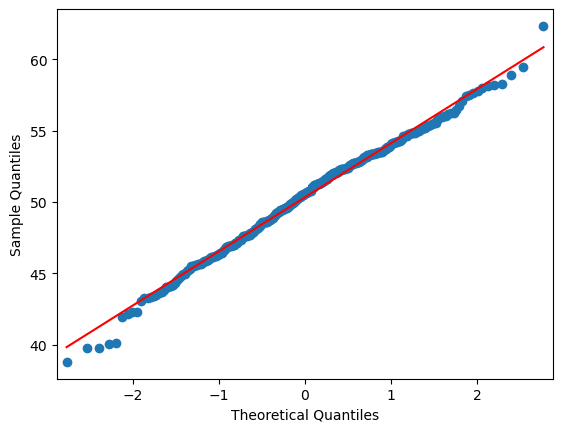

In [43]:
# Finally let's check normality of the big cap data distribution using a qqplot
# If these mushrooms are similar (perhaps of the same species?), you may expect
# the cap diameter feature to be distributed more Gaussian.   
fig = sm.qqplot(df_big["cap-diameter"],line='s')
plt.show()

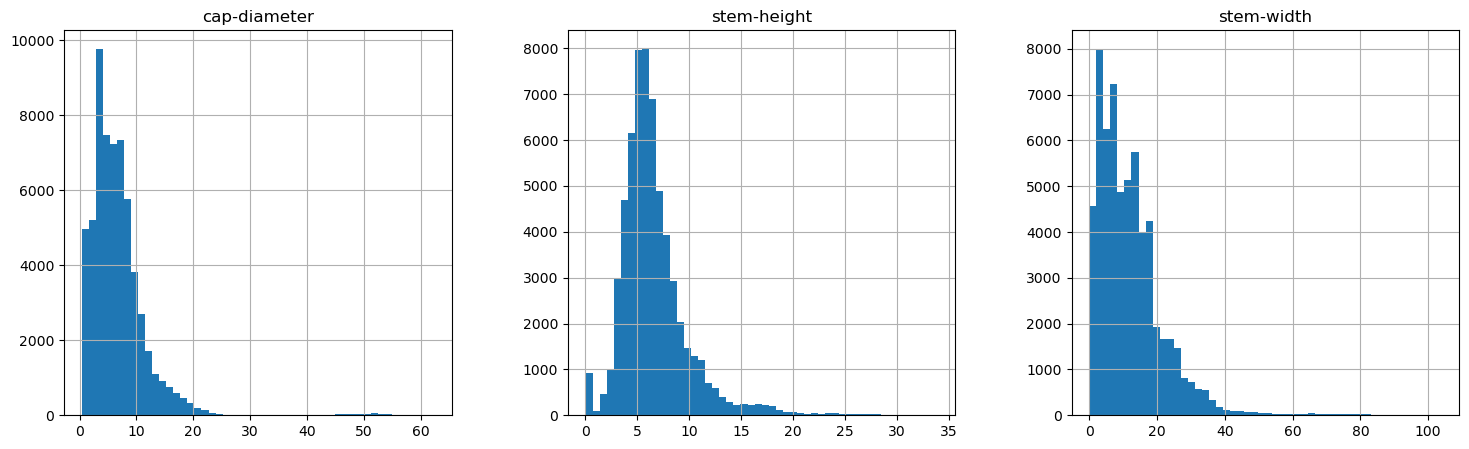

In [19]:
# Let's try to generate three histograms in one go writing some more generic 
# code

# Put the floating point types (all the numeric features are float64 based)
continuous_vars = df_mr.dtypes[df_mr.dtypes == "float64"].index.values.tolist()

# Subplot() returns a figure and axes object consisting of three axed lined up 
# in one row  
fig, axes = plt.subplots(1,3)
for i, x in enumerate(list(df_mr[continuous_vars].columns.values)):
    df_mr.hist(x, ax=axes.flatten()[i],bins = 50)
fig.set_size_inches(18, 5)
plt.show()

## Interpretation

None of the other two distributions look Gaussian either (note: they need not be Gaussian but the Gaussian distribution is common, statistically very well known and some predictive algorithms just "like" Gaussian data). All three distributions are right skewed (plots are small, but some "blueness" can still be observed far to the right on the x-axis). We can expect to see outliers in the boxplots. "The bigger the cap, the bigger the stem width and height?". 

The histogram in the middle (stem-height) has a bar sticking out at the left of the plot. It looks like its first bin starts with stem-height value 0 centimeters. Perhaps this bin contains just zero stem height mushrooms?     

In [20]:
# Check the middle plot's left most bin content.
range = df_mr['stem-height'].max()-df_mr['stem-height'].min()
rrange_per_bin = range/50 #first bin starts with 0 (included) and ends at value range per range_per_bin "excluded"
# mahematical notation bin one: [0, 0.6784)
sum(df_mr['stem-height'] < rrange_per_bin) == sum(df_mr['stem-height'] == 0)

True

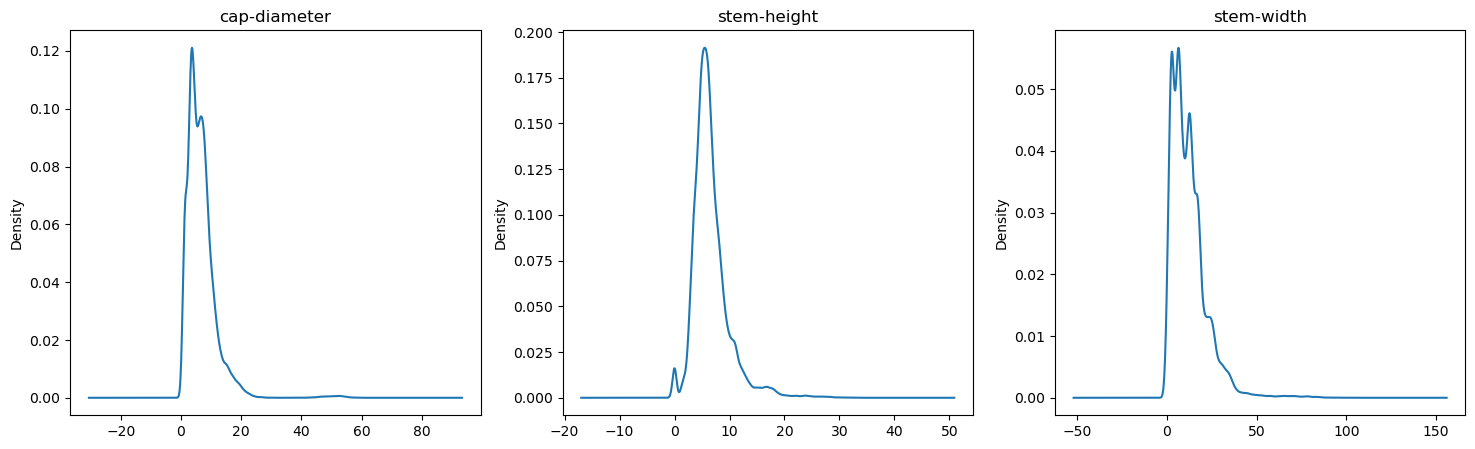

In [21]:
# Lets print the density plots too
continuous_vars = df_mr.dtypes[df_mr.dtypes == "float64"].index.values.tolist()
fig, axes = plt.subplots(1,len(continuous_vars))
for i, x in enumerate(list(df_mr[continuous_vars].columns.values)):
    ax = plt.sca(axes.flatten()[i]) #sca sets current axis
    df_mr[x].plot.density(title = continuous_vars[i])  
fig.set_size_inches(18, 5)
plt.show()

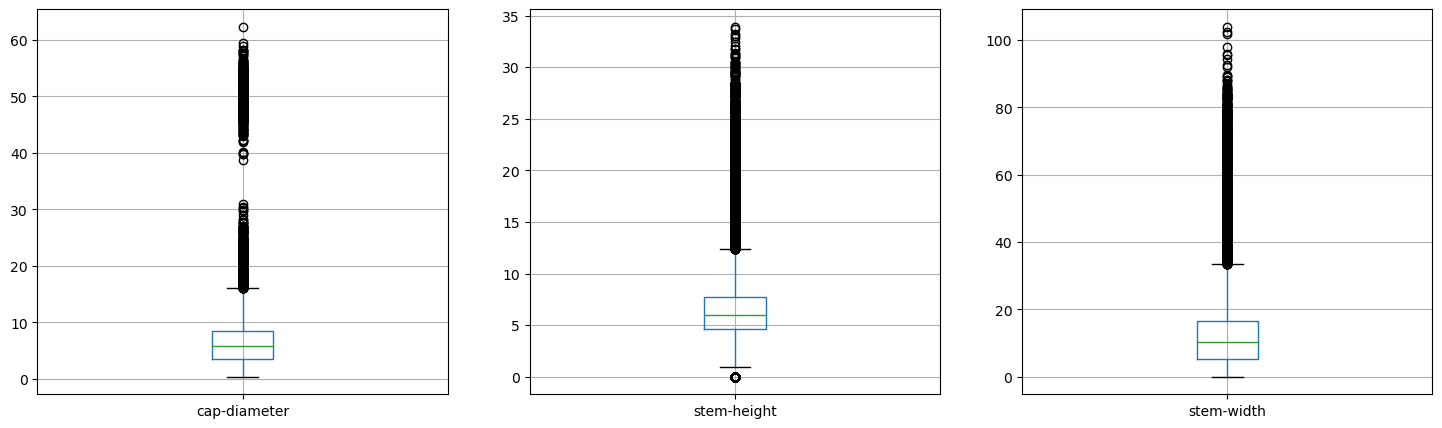

In [22]:
# Same for boxplots
continuous_vars = df_mr.dtypes[df_mr.dtypes == "float64"].index.values.tolist()
fig, axes = plt.subplots(1, len(continuous_vars)) # create figure and axes
for i, el in enumerate(list(df_mr[continuous_vars].columns.values)):
    df_mr.boxplot(el, ax=axes.flatten()[i])
fig.set_size_inches(18, 5)
plt.show()

## Interpretation

Each of the boxplots show us the presence of outliers. The method used to identify outliers relies on the shape of the distributions to be Gaussian. Our statistical knowledge of that particular distribution makes it possible to determine how extraordinary (so how uncommon) the numeric values of the outliers would be given a Gaussian shape. 

Always assess outliers (like we already did in the case of cap diameter). Are they real (real but uncommon) or are they the results of errors (fi the result of fat fingered input). Dont't just throw outliers "in the bin" without evaluating possible cause of their presence (note there are more ways to identify outliers than the IQR range based approach we took).

<Figure size 1800x500 with 0 Axes>

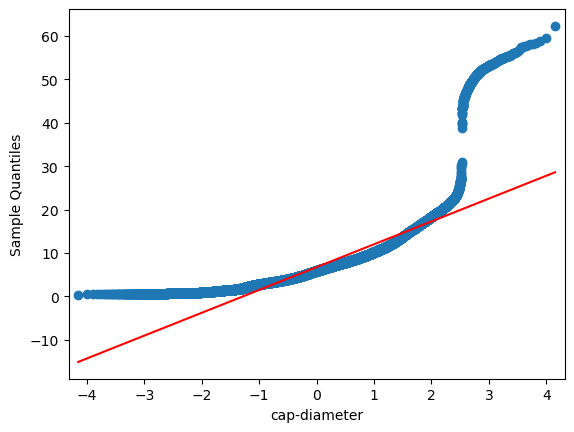

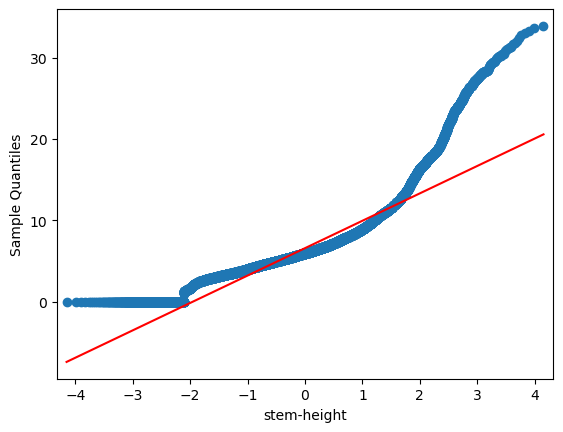

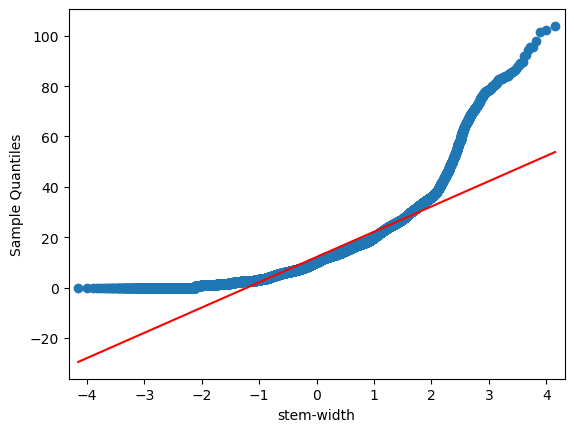

In [44]:
# Lets generate the qqplots for all three floating point features
continuous_vars = df_mr.dtypes[df_mr.dtypes == "float64"].index.values.tolist()
fig=plt.figure()
#fig, axes= plt.subplots(1,len(continuous_vars))
for i, x in enumerate(list(df_mr[continuous_vars].columns.values)):
    sm.qqplot(df_mr[x], line = 's', xlabel = continuous_vars[i])
fig.set_size_inches(18, 5)
plt.show()

In [23]:
# Let's calculate the outliers using a function and apply the function in a loop iterating over a list of
# the columns in the dataframe. In the loop we test if the column is included in the list containing the 
# float64 based columns.

continuous_vars = df_mr.dtypes[df_mr.dtypes == "float64"].index.values.tolist()
# print(continuous_vars)

# Function specification
def find_outliers(df_in, col_name):
    # the prepoation for IQR outlier calculation 
    Q1 = df_in[col_name].quantile(0.25)
    Q3 = df_in[col_name].quantile(0.75)
    IQR = Q3-Q1
    fence_low  = Q1-1.5*IQR # wiskercaps aka fences
    fence_high = Q3+1.5*IQR
    outlier_list=((df_in[col_name] <= fence_low) | (df_in[col_name] >= fence_high)).tolist()
    outlier_indexes=[i for i, x in enumerate(outlier_list) if x] # applying a list comprehension
    return outlier_indexes

#----------------------
bad_indexes=[]
for col in df_mr.columns:
    if col in continuous_vars:
        outlierindexes= find_outliers(df_mr, col)
        print(f"{col} number of outliers: {len(outlierindexes)}")
        bad_indexes.extend(outlierindexes)

cap-diameter number of outliers: 2396
stem-height number of outliers: 4084
stem-width number of outliers: 1980


## Investigation

We found ourselves a group of edible mushrooms easily identifiable by the rule "if cap-diameter >= 35 centimers then class = 'e'". A group of 353 mushrooms out of 353 are consistently classified by this rule! The visualisations each show that the cap diameters of this extraordinary subgroup are far better behaved from the perspective of spreading out according to the normal distribution. That's just the case, but not a necessity for this rule to be a trustworthy rule!  

Let's continue analyzing some categorical features.

As you can imagine, if we can predict the right class value given the data of the independent features, we would have a useful classifyer predicting mushroom edibility. So we start with class. 

In [46]:
# Let's look at frequency counts per level of the categorical data. A lot of 
# the features in df_mr are categorical/nominal of nature each with a limited number 
# of possible levels. For instance class is categorical of nature with level "poisonous" 
# and "edible", encoded as "p" and "e".

# Pandas function value_counts counts per level de number of ocurrences in the class column
# of dataframe df_mr
frequencies = pd.value_counts(df_mr['class'])
frequencies

class
p    33888
e    27181
Name: count, dtype: int64

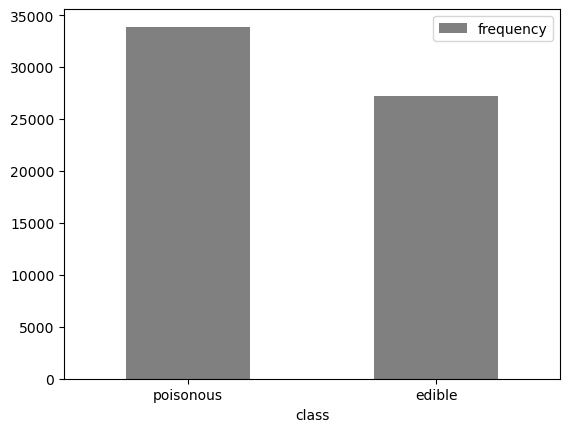

In [14]:
# The counts can be used to fuel a bar graph separating the set of mushrooms in poisoneus 
# and edible subsets.

frequency = pd.value_counts(df_mr['class'])
poisonous = pd.Series(['poisonous', 'edible'], index = ['p','e'])
dict_bar={'class' : poisonous, 'frequency' : frequency}
df_mr_bar = pd.DataFrame(dict_bar)
ax = df_mr_bar.plot.bar(x='class', y='frequency', rot = 0, color = 'grey')

# This example uses very basic plotting functionality included in Pandas 
# dataframe objects. The plot attribute (df_mr_bar.plot) contains a family of methods
# for different plot types (bar, barh, hist, density, kde, line, pie, area).

# If you need more control for instance because you need to produce publication worthy 
# graphs, the underlying matplotlib package offers you more control over the nuts and 
# bolts of your graph. Other packages like for instance seaborn can be used to make more 
# modern looking graphs (matplotlib is a very large toolbox but graphs produced with it
# look a bit old fashioned from a style perspective).

## Investigation

There's not a lot to tell about the frequency count of levels edible and poisonous except for the fact that the class levels are reasonably well balanced. If the task at hand is a prediction task, like predicting edibility of mushrooms on the basis of the features of the mushrooms recorded, a balanced set of observations is preferable. If the set would contain 99% edible and 1% poisonous mushrooms, the predictive algorithm will have a hard time finding the function/pattern in the small set  of poisonous mushrooms (some 600, about 1% of 60000). The algorithm when instructed to optimize its internals with as goal to maximize prediction accuracy may result in skipping the search for patterns and predict "edible" by default (99% acurate sounds impressive but the people falling ill because of eating poisonous mushrooms are unhappy even given the 99% accuracy; there're two forms of accuracy in the case of a binary prediction task accuracy of predicting edibility and accuracy of predicting toxicity). 

In [47]:
# Let's look at another nominal feature. To get an impression of the frequencies per level 
# of a nominal variable, count per level the number of ocurrences in the column of the dataframe. 
pd.value_counts(df_mr["cap-shape"])

cap-shape
x    26934
f    13404
s     7164
b     5694
o     3460
p     2598
c     1815
Name: count, dtype: int64

In [13]:
# The one letter level indications do not really help. We better fix this somehow.
frequency = pd.value_counts(df_mr['cap-shape'])
capShape = pd.Series(['convex', 'flat','sunken', 'bell', 'others', 'spherical','conical'], 
                 index = ['x','f','s','b','o','p','c'])
dict_bar={'CapShape' : capShape, 'Frequency' : frequency}
df_mr_bar = pd.DataFrame(dict_bar)
print(df_mr_bar)

    CapShape  Frequency
x     convex      26934
f       flat      13404
s     sunken       7164
b       bell       5694
o     others       3460
p  spherical       2598
c    conical       1815


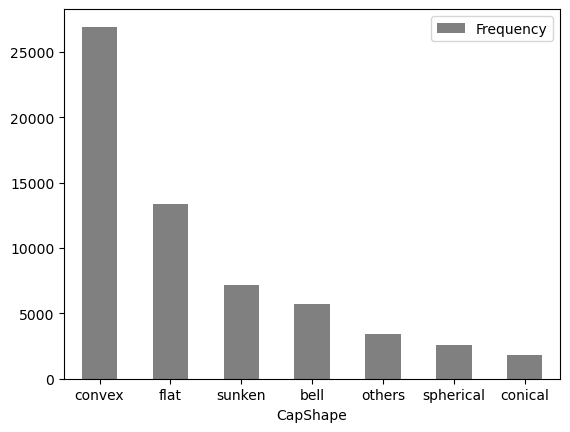

In [14]:
# Let's also look at the frequencies of different cap shape levels.
ax = df_mr_bar.plot.bar(x='CapShape', y='Frequency', rot=0, color ='grey')

In [ ]:
"cap-surface"
cap-surface (n): fibrous=i, grooves=g, scaly=y, smooth=s, shiny=h, leathery=l, silky=k, sticky=t, wrinkled=w, fleshy=e

In [89]:
df_mr_p = df_mr[df_mr['class']=='p']
df_mr_e = df_mr[df_mr['class']=='e']
capShape = pd.Series(['convex', 'flat','sunken', 'bell', 'others', 'spherical','conical'], 
               index = ['x','f','s','b','o','p','c'])
frequency_p = pd.value_counts(df_mr_p['cap-shape'])
frequency_e = pd.value_counts(df_mr_e['cap-shape'])
df = pd.DataFrame({'poisonous' : frequency_p, 'edible': frequency_e, 'capshape': capShape})
df

,poisonous,edible,capshape
b,4436,1258,bell
c,1041,774,conical
f,6902,6502,flat
o,2491,825,others
p,1031,1567,spherical
s,3869,3295,sunken
x,13972,12960,convex


  Cap Surface  Frequency
d         NaN       4432
e      fleshy       2584
g     grooves       4724
h       shiny       4974
i     fibrous       2225
k       silky       2303
l    leathery       1412
s      smooth       7608
t      sticky       8196
w    wrinkled       2150
y       scaly       6341

 Index(['d', 'e', 'g', 'h', 'i', 'k', 'l', 's', 't', 'w', 'y'], dtype='object')


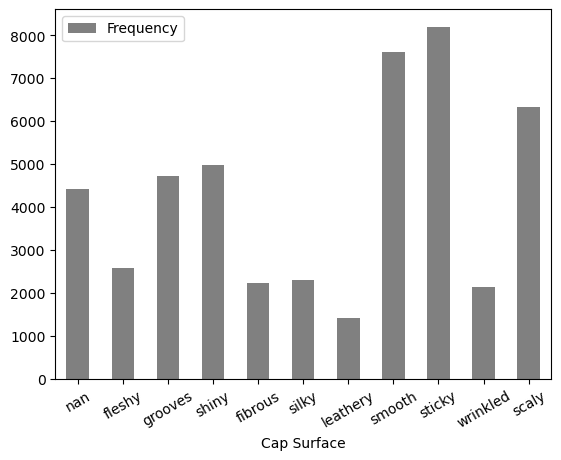

In [48]:
# Another example: cap-surface   
frequency = pd.value_counts(df_mr['cap-surface'])
capsurface = pd.Series(['fibrous', 'grooves','scaly', 'smooth', 'leathery', 'shiny','silky', 'sticky', 'wrinkled','fleshy'], 
                 index = ['i','g','y','s','l','h','k','t','w', 'e'])
dict_bar={'Cap Surface' : capsurface, 'Frequency' : frequency}
df_mr_bar = pd.DataFrame(dict_bar)
print(df_mr_bar)
print(f"\n {df_mr_bar.index}")
ax = df_mr_bar.plot.bar(x='Cap Surface', y='Frequency', rot=30, color ='grey')

## Investigation

We see 11 bars though we have 10 proper index values. In the printed dataframe df_mr_bar we see that index value d is included (you might also rerun code df_mr.describe(include = 'all') to see that that there are 11 unique values used for feature cap-surface in the dataframe df_mr). This value is not mentioned in the codebook accompanying the dataset. There's no mapping possible to a more meaningful cap-surface description and that's why the df_mr_bar dataframe column Cap Surface contains a NaN value. What "d" actually stand for is unclear but roughly 4500 mushrooms have that cap surface type. A search on the internet didn't provide a plausible answer (there's some vague indication that possibly the "death cap mushroom" is meant). Also note that 23% of the cap-surface values are truly missing.

Back to the domain expert for a possible explanation?

## Wrapping Up

The idea of EDA is to build up knowledge about your data set. This knowledge at minimum should provide insight in the data quality issues that could affect the predictive models we are going to build but preferably also determines the semantical value of the data. So, EDA is not merely about establishing the level quality of data but preferably also about the possible semantical value of the data at hand. Ideally questions guide the search for determining the possible semantical value.

This example notebook mildly touched upon
 - different types of data (nominal, metrical) 
 - descriptive statistics (min/max/median/quantiles/variance/standard deviation of metrical data)
 - the Gaussian data distribution
 - visualization of  nominal and metrical data (nominal: bar frequency plots, metrical: boxplots, histograms, density plots, qqplots)
 - the EDA process 

## Appetizer Bivariate Exploratory Data Analysis

Bivariate EDA focusses on relationship between two variables. If there's a relationship between for instance the class target feature and one of the independent features, that might be of use in predicting a mushroom's edibility.  

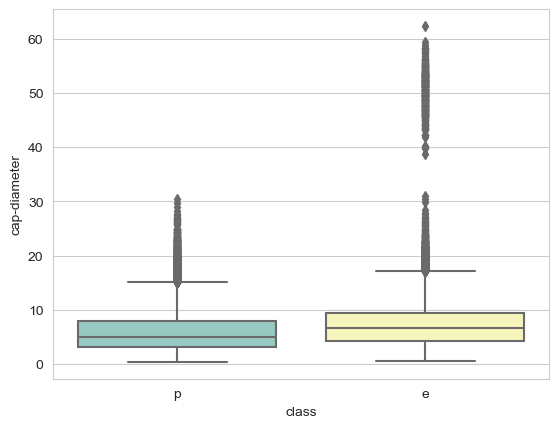

In [49]:
# Let's have a look at cap diameter and the class feature (we already know that very 
# large caps indicate edible mushrooms but is there more we can find?). Let's make a 
# boxplot and separate the cap diameter set in subsets of the edible level and the 
# poisonous level.
sns.set_style("whitegrid")
ax = sns.boxplot(x="class", y="cap-diameter", data=df_mr, palette="Set3")

## Interpretation
We already investigated the island of edible mushrooms which obviously also can be identified in the boxplot of the edible cap diameter subset. Interesting is the fact that the there's some separation visible between the Inter Quartile Range boxes of the poisonous and the edible subsets. There's a part of the "p" IQR box not covered by the "e" IQR box. Could there be another range of cap diameters reserved this time for just poisonous mushrooms? That would require us to check if there's no edible mushroom in a part of the lower whisker of the "e" boxplot overlapping the second quartile of the "p" boxplot!

For now, let's wrap up this example with statistical tests on difference of means and of distributional differences in the subsets. 

In [38]:
# The Central Limit Theorem justifies the use of a standard two sample difference of means test. 
# Note that we already know that there's this "island" with large capped edible mushrooms is present 
# in the data set playing a role in the statistical tests.

from scipy.stats import ttest_ind
data_e = df_mr[df_mr['class'] == 'e']['cap-diameter']
data_p = df_mr[df_mr['class'] == 'p']["cap-diameter"]

print(f'Variance cap diameter of edible mushrooms: {data_e.var()}') # check variances
print(f'Variance cap diameter of poisonous mushrooms: {data_p.var()}')
result = ttest_ind(data_e, data_p, equal_var=False)
p = result.pvalue
print(f'p value: {p}')
alpha = 0.001
if p > alpha:
    print('Difference in means statistically not probable (fail to reject H0)')
else:
    print('Different in means statistically probable (reject H0)')

Variance cap diameter of edible mushrooms: 40.6202838581827
Variance cap diameter of poisonous mushrooms: 15.770510853008007
p value: 0.0
Different in means statistically probable (reject H0)


In [24]:
# We'll also use the non parametric mann whitney test. This kind of test doesn't require
# any distributional assumptions to be made (like "sample data comes from a Gaussian 
# distribution"). The boxplots seem to indicate that the cap diameter distribution of 
# the poisonous mushrooms is asymmetrical.

data_e = df_mr[df_mr['class'] == 'e']['cap-diameter']
data_p = df_mr[df_mr['class'] == 'p']["cap-diameter"]
stat, p = ss.mannwhitneyu(data_e, data_p)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.001
if p > alpha:
    print('Samples come from equal distributions (fail to reject H0)')
else:
    print('Sample come from different distributions (reject H0)')

Statistics=564857727.500, p=0.000
Sample come from different distributions (reject H0)
